<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
satfile = './sat_scores.csv'
drugfile ='./drug-use-by-age.csv'

In [3]:
with open(satfile) as csvfile:
    satreader = csv.reader(csvfile)
    
    satdata =[row for row in satreader]
    csvfile.close()

In [4]:
header = satdata[0]
data = satdata[1::]
satdict = {key:value for key, value in zip(header,np.array(data).transpose())}

In [5]:
pprint (satdict)

{'Math': array(['510', '513', '515', '505', '516', '499', '499', '506', '500',
       '501', '499', '510', '499', '489', '501', '488', '474', '526',
       '499', '527', '499', '515', '510', '517', '525', '515', '542',
       '439', '539', '512', '542', '553', '542', '589', '550', '545',
       '572', '589', '580', '554', '568', '561', '577', '562', '596',
       '550', '570', '603', '582', '599', '551', '514'], dtype='<U3'),
 'Rate': array(['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67',
       '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52',
       '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13',
       '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6',
       '6', '5', '5', '4', '4', '4', '45'], dtype='<U3'),
 'State': array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
       'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
       'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'I

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [6]:
sat = pd.DataFrame(satdict)
sat.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [7]:
sat2 = pd.read_csv(satfile)
sat2.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
sat2.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [9]:
sat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [10]:
sat2.State.describe()

count     52
unique    52
top       NM
freq       1
Name: State, dtype: object

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [11]:
labels = ['Type', 'Info', 'Description']
description = ['The USA State data is taken from','The participation rate of students', 'The Average Verbal SAT Score',' The Average Math SAT Score' ]

In [12]:
#adding labels and de
datadictionary = {key:{label:[value] for label, value in zip(labels,[sat2[key].dtype, sat2[key].describe(), description[index]] ) } for index, key in enumerate(sat2.columns) }

In [13]:
datadictionary.update({'Shape':sat2.shape})

In [14]:
pprint (datadictionary)

{'Math': {'Description': [' The Average Math SAT Score'],
          'Info': [count     52.000000
mean     531.500000
std       36.014975
min      439.000000
25%      504.000000
50%      521.000000
75%      555.750000
max      603.000000
Name: Math, dtype: float64],
          'Type': [dtype('int64')]},
 'Rate': {'Description': ['The participation rate of students'],
          'Info': [count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64],
          'Type': [dtype('int64')]},
 'Shape': (52, 4),
 'State': {'Description': ['The USA State data is taken from'],
           'Info': [count     52
unique    52
top       NM
freq       1
Name: State, dtype: object],
           'Type': [dtype('O')]},
 'Verbal': {'Description': ['The Average Verbal SAT Score'],
            'Info': [count     52.000000
mean     532.019231
std       33.236225
min      482.000000
25%      501.00

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

C:\Users\Serotonin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


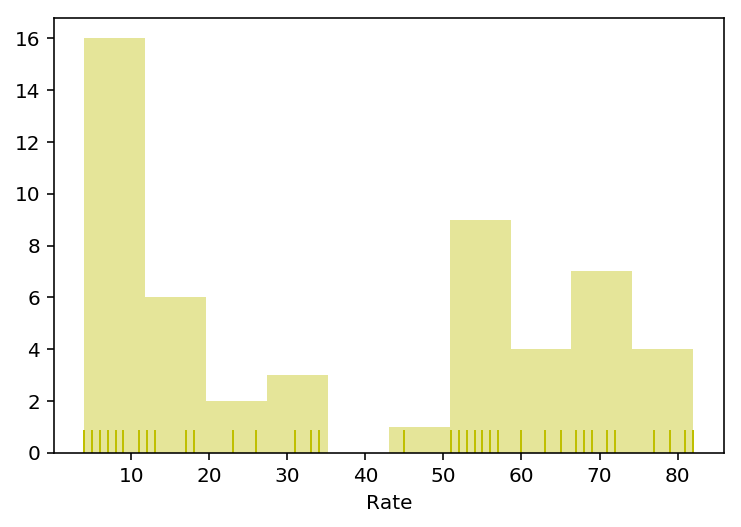

In [15]:
#from scipy.stats import norm
sns.distplot(sat2['Rate'], kde = False, bins = 10, rug = True, color = 'y')

C:\Users\Serotonin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


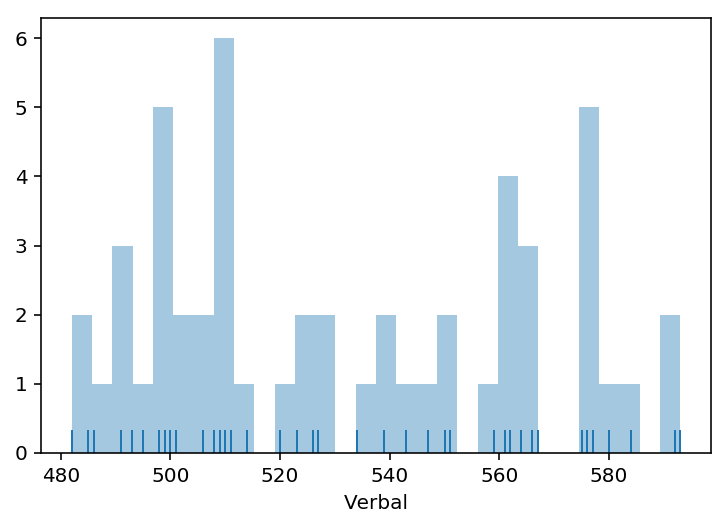

In [16]:
sns.distplot(sat2['Verbal'], kde = False, bins = 30, rug = True)

C:\Users\Serotonin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


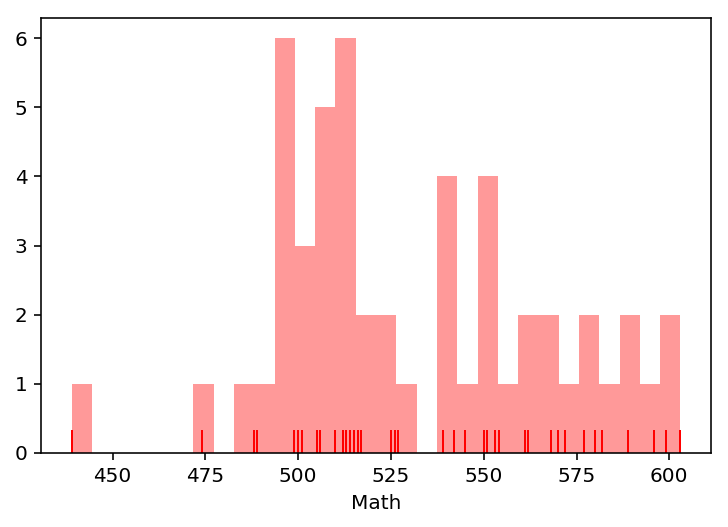

In [17]:
sns.distplot(sat2['Math'], kde = False, bins = 30, color='r', rug = True)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

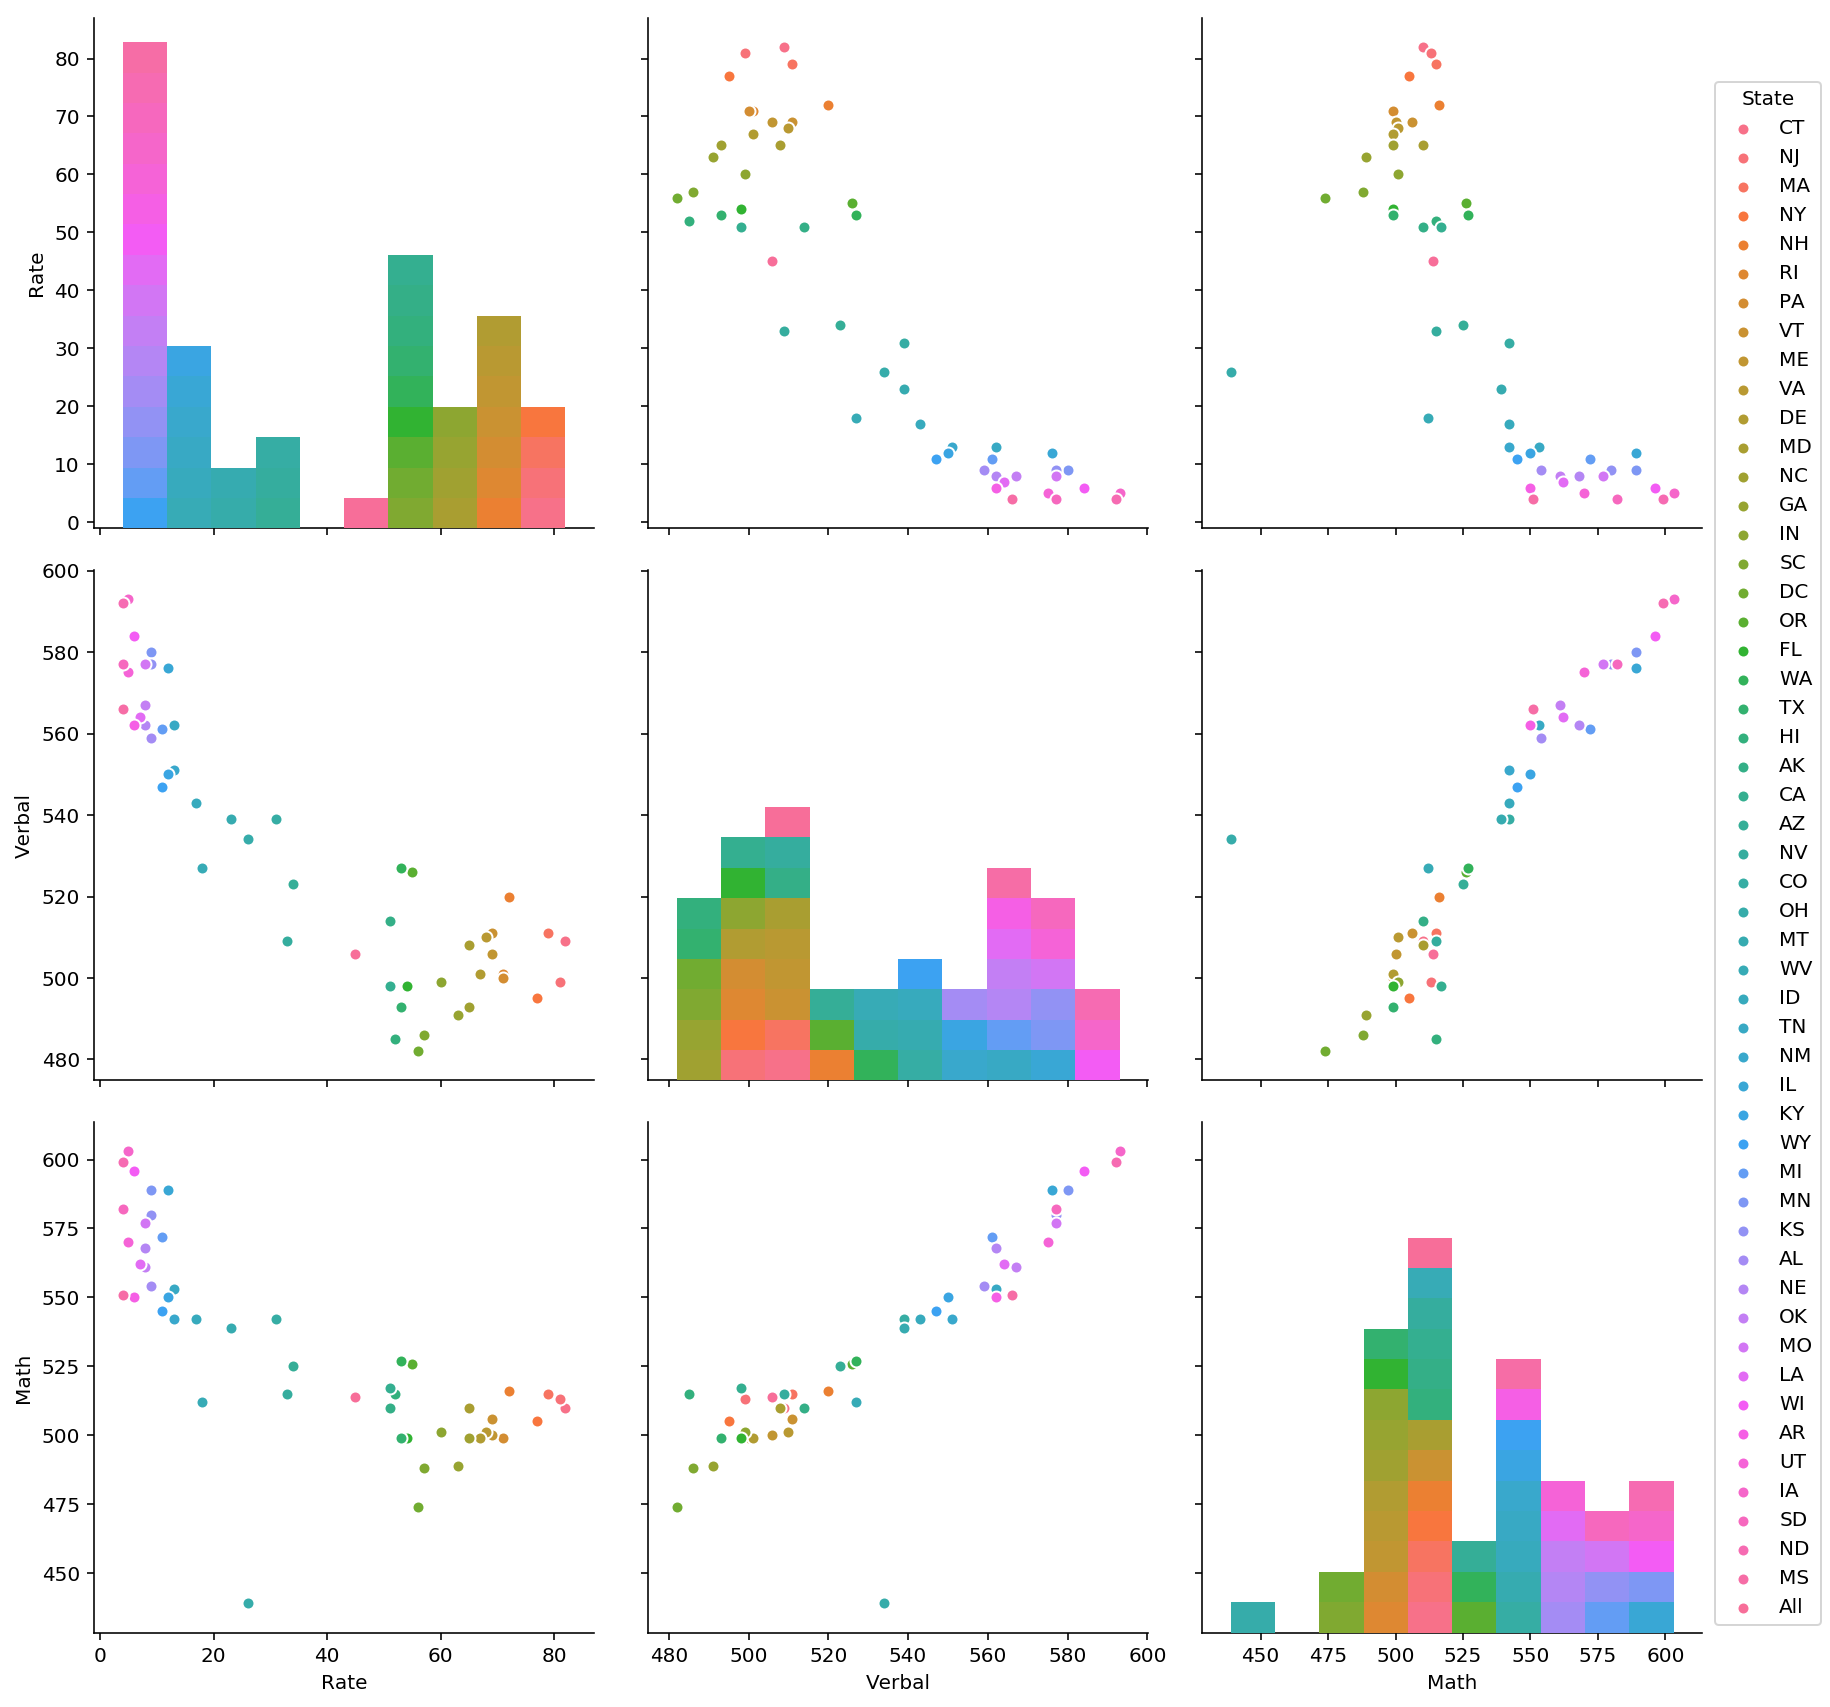

In [18]:
 sns.pairplot(sat2, size =4, vars = ['Rate','Verbal','Math'], hue ='State' )

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

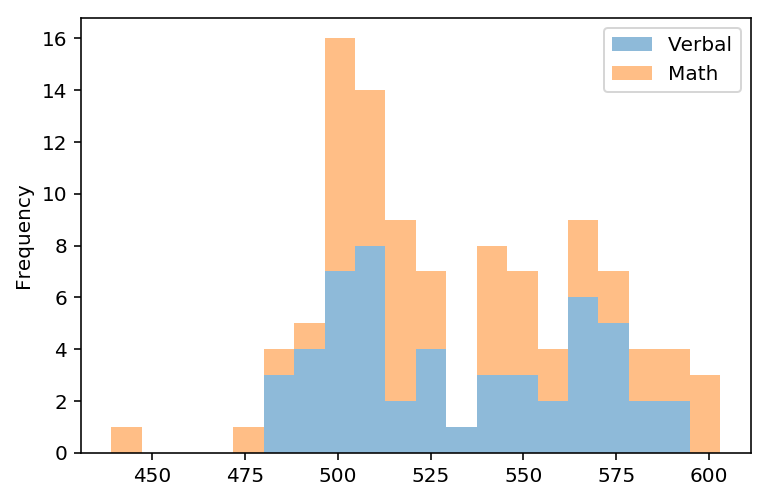

In [19]:
sat2[['Verbal','Math']].plot.hist(alpha = 0.5, bins = 20, stacked = True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

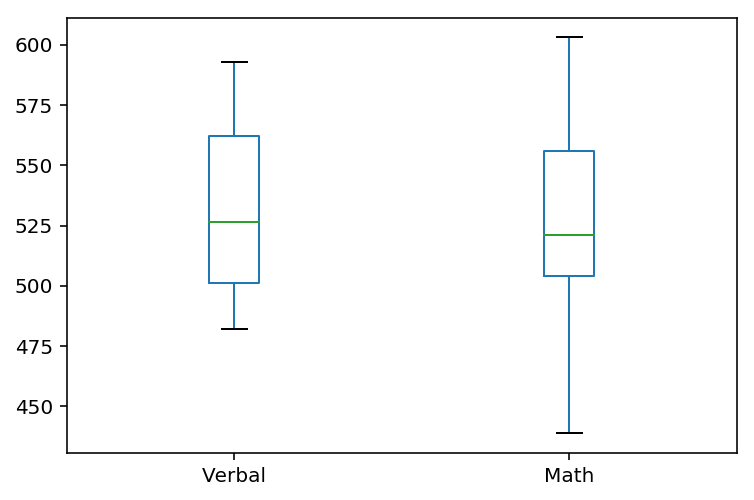

In [20]:
sat2[['Verbal','Math']].plot.box()
#boxplot give some kind of descriptive stats to the variable as compared to histogram

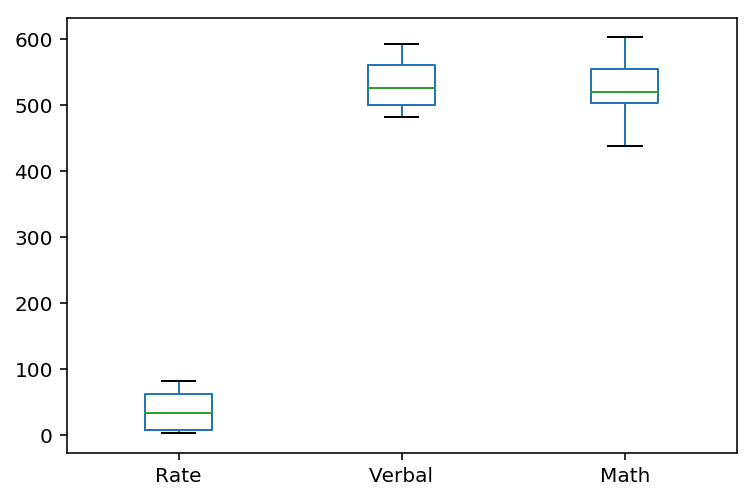

In [21]:
sat2.plot.box()
#rates scale is just way too small compared to Verbal and Math

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


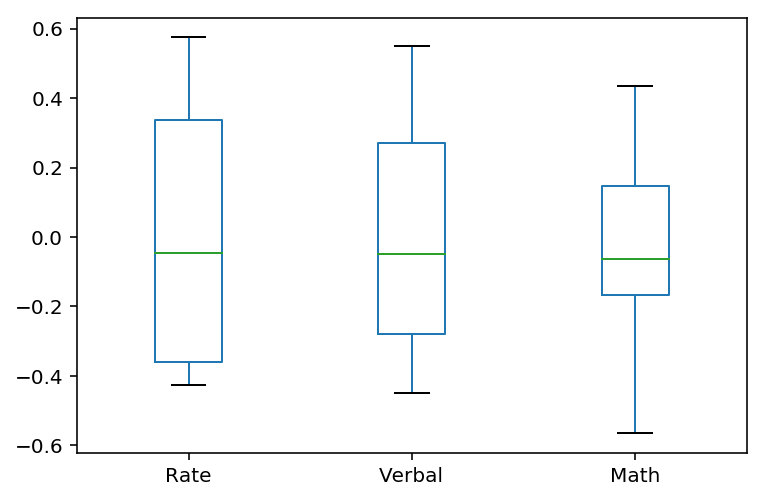

In [22]:
df_norm = (sat2[['Rate','Verbal','Math']] - sat2[['Rate','Verbal','Math']].mean()) / (sat2[['Rate','Verbal','Math']].max() - sat2[['Rate','Verbal','Math']].min())
df_norm.plot.box()
#normalising them to the same set of scale will allow a more appropriate boxplot

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [23]:
vmean = sat2.loc [sat2['Verbal'] > np.mean(sat2['Verbal']), 'State']
print(vmean)
print(vmean.count())
#slightly less than half the total states have an above average Verbal score, the distribution might be fairly normal

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
24


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [24]:
vmed = sat2.loc [sat2['Verbal'] > np.median(sat2['Verbal']), 'State']
print(vmed)
print(vmed.count())
# median got 2 more count than mean. This means that the median score is lower than the average score

19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
26


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [25]:
sat2['difference'] = sat2['Verbal'] - sat2['Math']

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [26]:
#VERBAL > MATH
arts = sat2.loc[:,['State','Verbal','Math','Rate','difference']].sort_values('difference', ascending=False).head(10)
arts.reset_index(inplace=True)
arts.drop('index', axis=1, errors='ignore',  inplace = True)
arts.head(10)

,State,Verbal,Math,Rate,difference
0,OH,534,439,26,95
1,MS,566,551,4,15
2,WV,527,512,18,15
3,AR,562,550,6,12
4,NM,551,542,13,9
5,TN,562,553,13,9
6,VA,510,501,68,9
7,DC,482,474,56,8
8,ME,506,500,69,6
9,OK,567,561,8,6


In [27]:
#VERBAL < MATH
engi= sat2.loc[:,['State','Verbal','Math','Rate','difference']].sort_values('difference',ascending=True).head(10)
engi.reset_index(inplace=True)
engi.drop('index', axis=1, errors='ignore',  inplace = True)
engi.head(10)

,State,Verbal,Math,Rate,difference
0,HI,485,515,52,-30
1,CA,498,517,51,-19
2,NJ,499,513,81,-14
3,IL,576,589,12,-13
4,WI,584,596,6,-12
5,MI,561,572,11,-11
6,NY,495,505,77,-10
7,IA,593,603,5,-10
8,MN,580,589,9,-9
9,All,506,514,45,-8


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [28]:
sat2.corr()


,Rate,Verbal,Math,difference
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
difference,-0.101412,0.052600,-0.388219,1.000000


In [29]:
engi.corr()

,Verbal,Math,Rate,difference
Verbal,1.000000,0.990605,-0.919146,0.502806
Math,0.990605,1.000000,-0.936380,0.379873
Rate,-0.919146,-0.936380,1.000000,-0.298640
difference,0.502806,0.379873,-0.298640,1.000000


In [30]:
arts.corr()

,Verbal,Math,Rate,difference
Verbal,1.000000,0.739411,-0.890756,0.002363
Math,0.739411,1.000000,-0.602454,-0.671505
Rate,-0.890756,-0.602454,1.000000,-0.085551
difference,0.002363,-0.671505,-0.085551,1.000000


In [31]:
#Generally, if you are good at math you will be good verbally as well. 
#But if you are good at Verbal you might not be good at math
#Overall there is a better correlation between Verbal and rate suggesting more participation rate more verbal score?
#however, math and rate are slightly lower but still kind of related as well.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

## 

In [32]:
sat2.describe()
#count is the total number of variables in the columns
#mean is the average values of the column
# std is the standard deviation of the column
#min is the lowest value in the column
#max is the highest value of the column
#percentiles the value below which a given percentage of observations in a group of observations fall

,Rate,Verbal,Math,difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [33]:
sat_cov = sat2.cov()
sat_cov

,Rate,Verbal,Math,difference
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
difference,-43.552036,27.499623,-219.931373,247.430995


In [34]:
#1.Covariance - measuring the Variance between two variables while Correlation - normalizing the Covariance
#2.Convert covariance to correlation by dividing covariance by the standard deviations of the variables.
#3. Correlation normalise all the values across the data giving in a less confusing way of looking at the data

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [35]:
drug = pd.read_csv(drugfile)
drug.head(20)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [36]:
print(drug.isnull().sum().sum())
print(drug.dtypes)

0
age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object


In [37]:
import re
number = '(^[*0-9.]*)'

In [38]:

def intonumeric(column,df=drug):
    
    nonsense = '[^0-9]'
    #This takes the maximum value if its a range
    try:
        #this finds the nonsense
        mask = df[column].apply(lambda x: bool(re.match(nonsense,x)))
         #this changes makes the nonsense into nan
        df.loc[mask,column] = np.nan
    except:
        pass
    
    
    #this changes object into numeric
    df[column]= pd.to_numeric(df[column], errors='ignore')

In [39]:
dirty =[clean[0] for clean in drug.dtypes.iteritems() if clean[1] =='object']
dirty.pop(0) #cleans the age out as we will process that differently

'age'

In [40]:
dirty

['cocaine-frequency',
 'crack-frequency',
 'heroin-frequency',
 'inhalant-frequency',
 'oxycontin-frequency',
 'meth-frequency']

In [41]:
for filth in dirty:
    intonumeric(filth)
try:
    drug['age'] = [element[0] for element in drug['age'].apply(lambda x: (re.findall(number,x)) )]
    drug['age']= pd.to_numeric(drug['age'], errors='ignore')
except:
    pass

In [42]:
drug.head(20)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


### 7.2 Do a high-level, initial overview of the data
1
Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

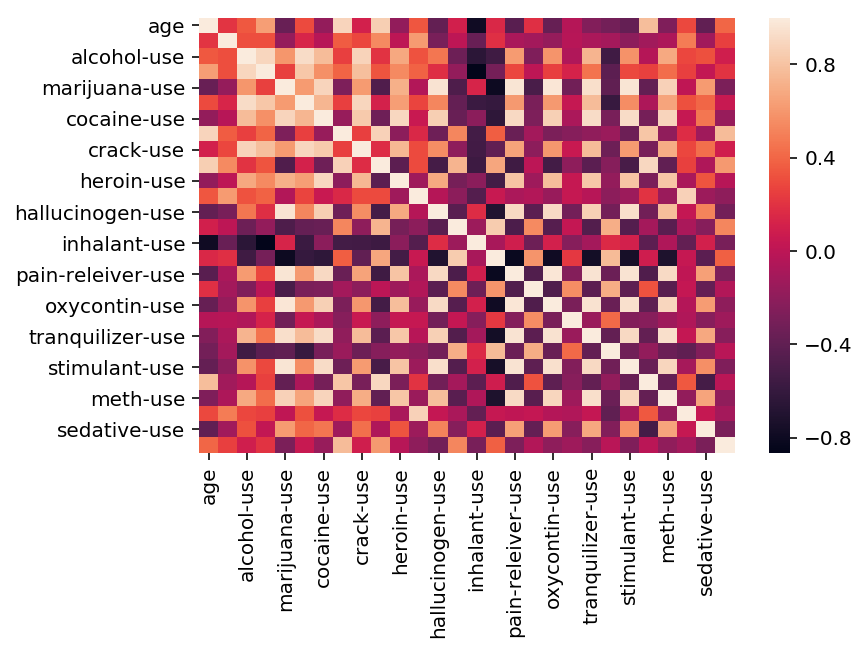

In [43]:
sns.heatmap(drug.corr())
#plt.rcParams['figure.figsize']=(10,10)

In [44]:
use = [use for use in drug.columns[2::2] ]
frequencies = [ frequency for frequency in drug.columns[1::2]]
frequencies.pop(0)

'n'

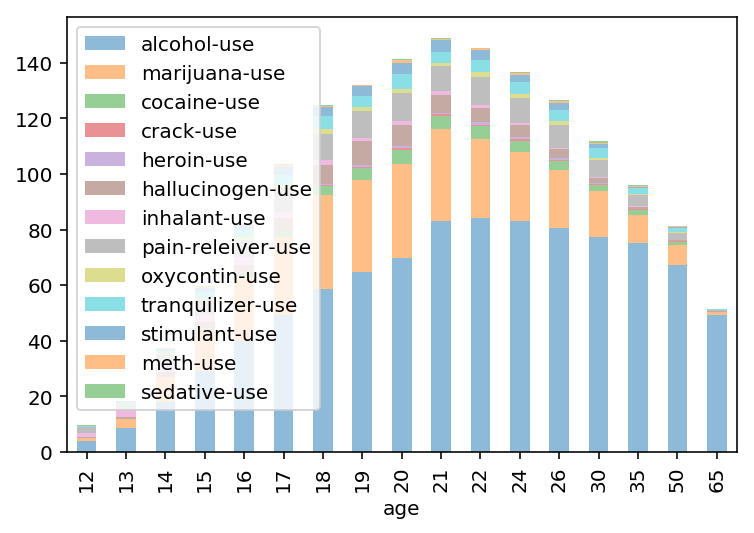

In [45]:
drug.plot.bar(x= 'age',y=use,alpha=0.5, stacked = True)

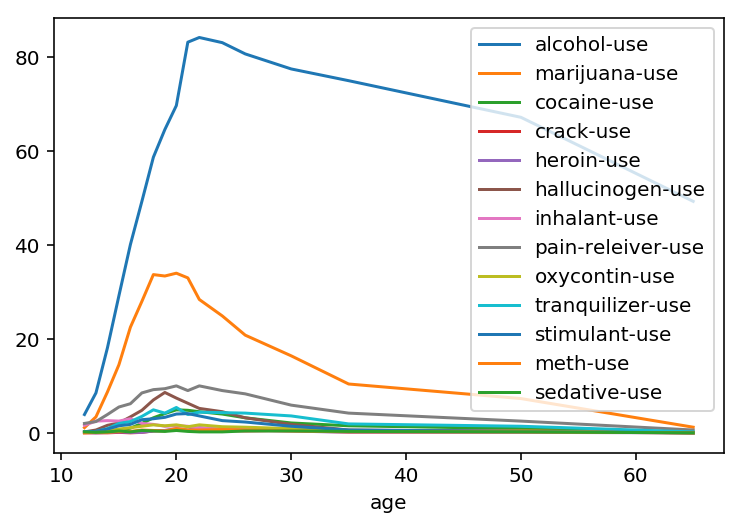

In [46]:
drug.plot.line(x='age',y=use)

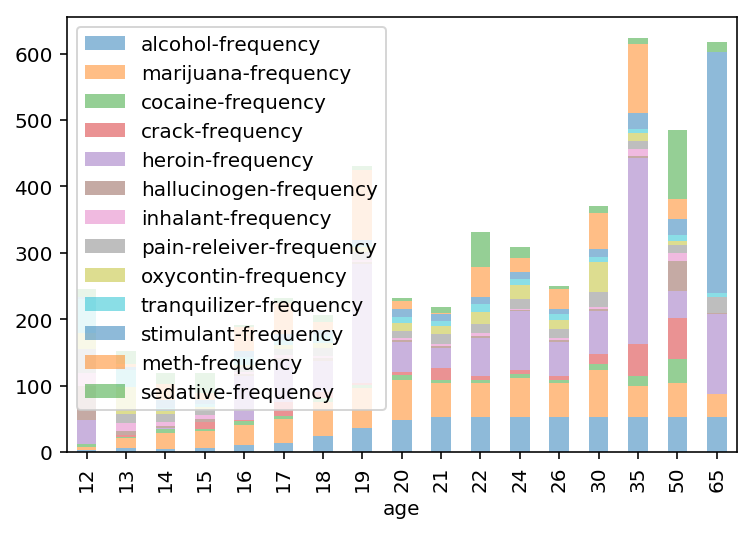

In [47]:
drug.plot.bar(x= 'age',y=frequencies,alpha=0.5, stacked = True)

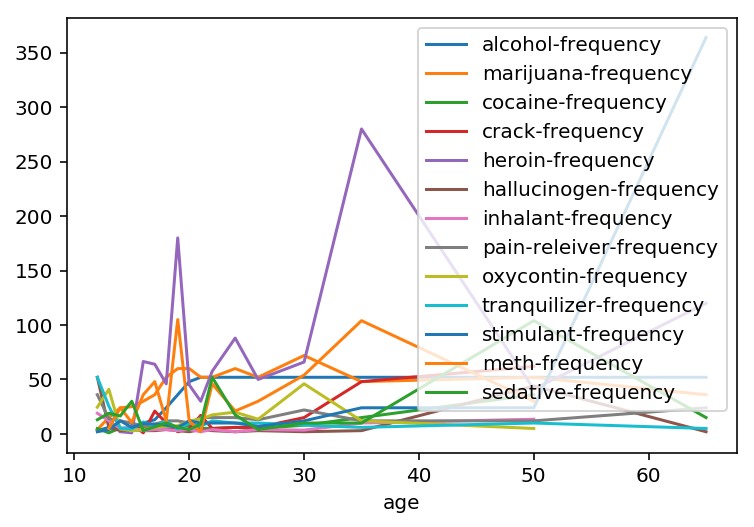

In [48]:
drug.plot.line(x='age',y=frequencies)

In [49]:
#remove alcohol and marijuano
without = use[:]
without.remove('marijuana-use')
without.remove('alcohol-use')

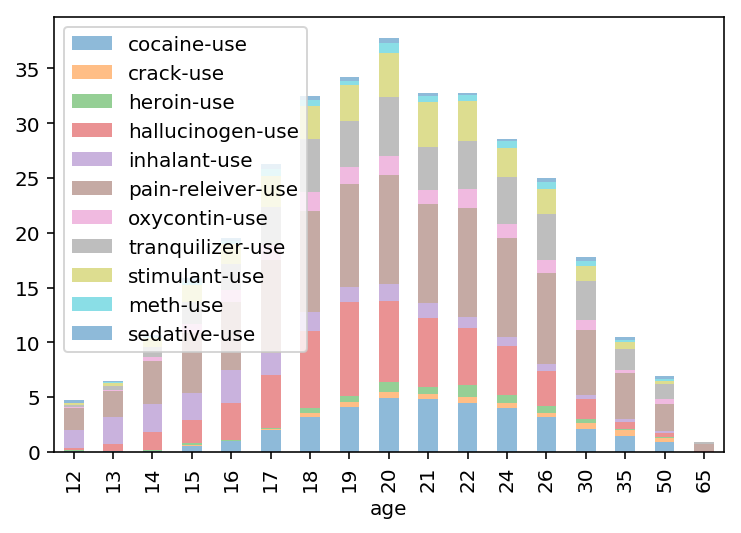

In [50]:
drug.plot.bar(x= 'age',y=without,alpha=0.5, stacked = True)

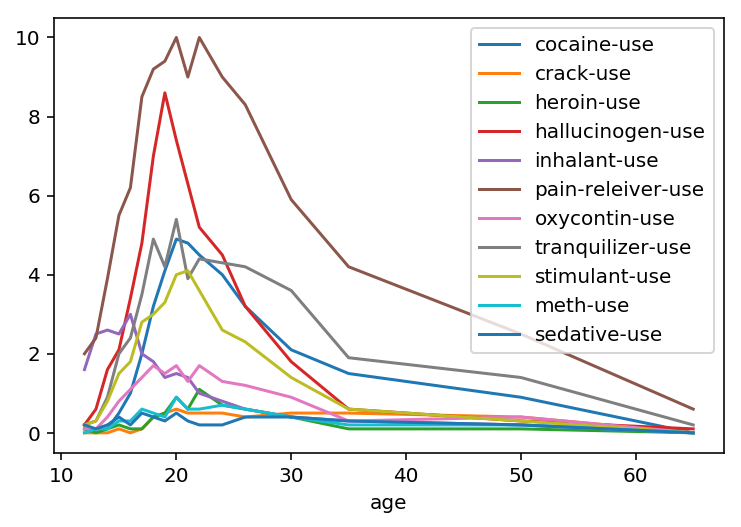

In [51]:
drug.plot.line(x='age',y=without)

In [52]:
total =[]
for uses,frequency in zip(use,frequencies):
    word = uses.rsplit('-',1)[0] + '-total'
    total.append(word)
    drug[word] = drug[uses] * drug[frequency]
    

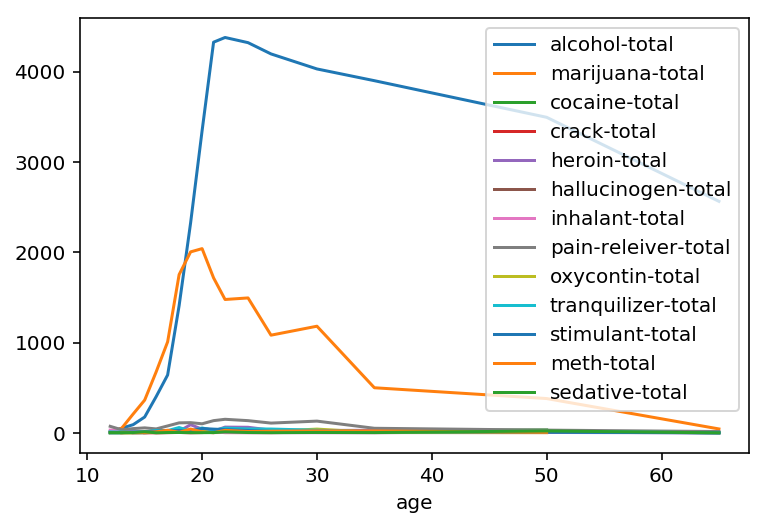

In [53]:
drug.plot.line(x='age',y=total)

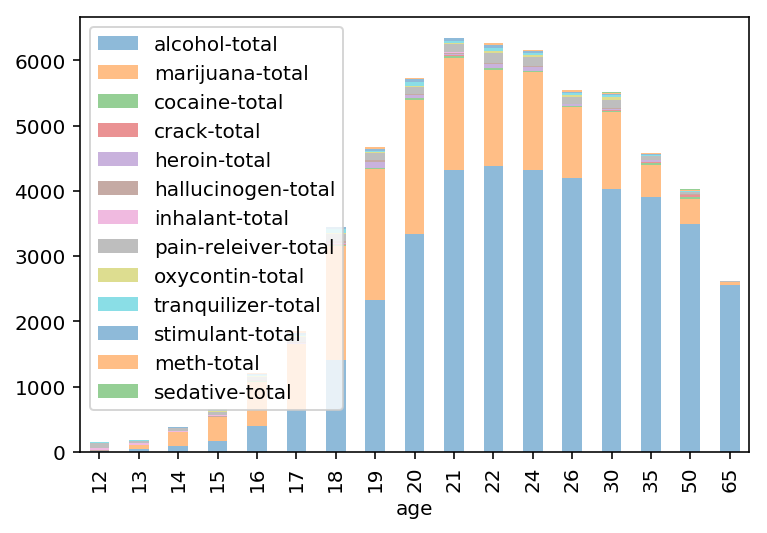

In [54]:
drug.plot.bar(x= 'age',y=total,alpha=0.5, stacked = True)

In [55]:
totalwithout =total[:]
totalwithout.remove('marijuana-total')
totalwithout.remove('alcohol-total')

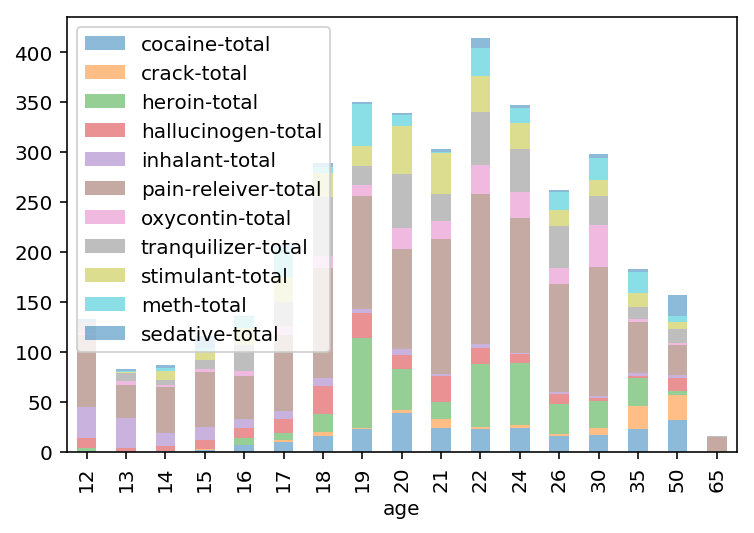

In [56]:
drug.plot.bar(x= 'age',y=totalwithout,alpha=0.5, stacked = True)

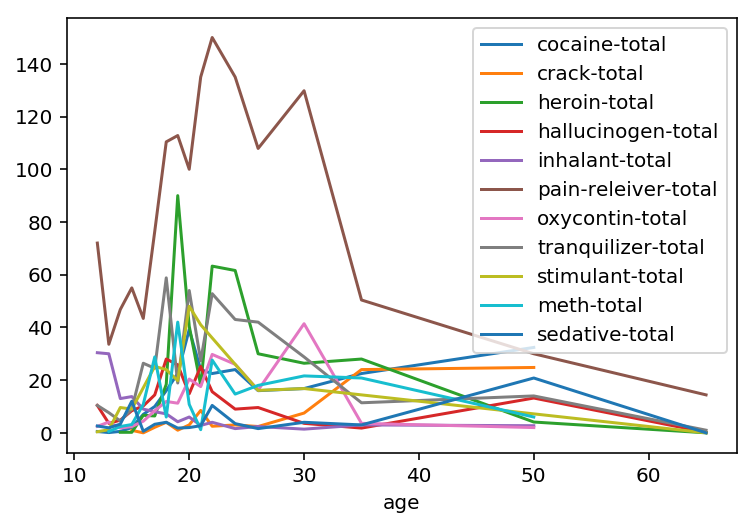

In [57]:
drug.plot.line(x='age',y=totalwithout)

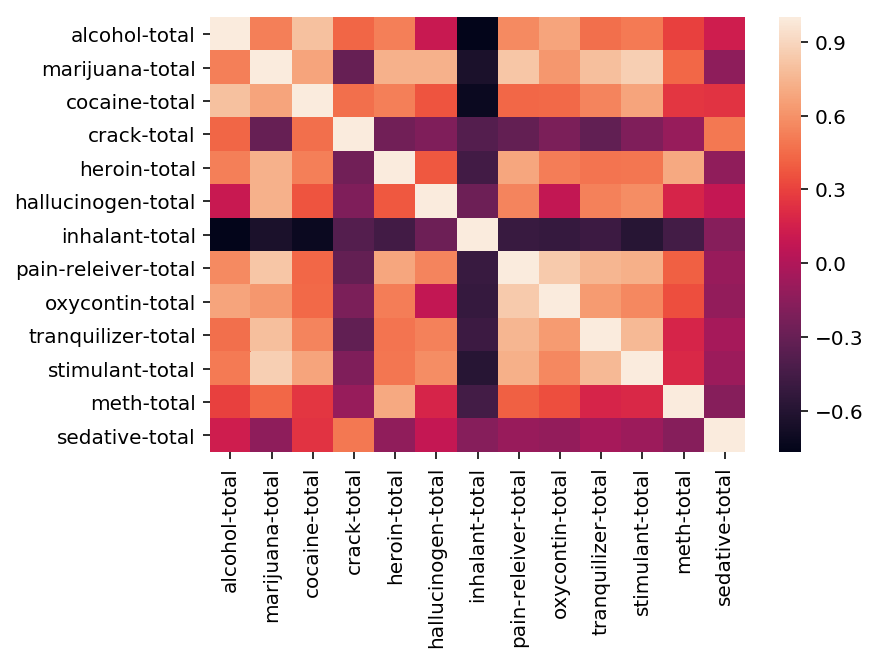

In [58]:
sns.heatmap(drug[total].corr())

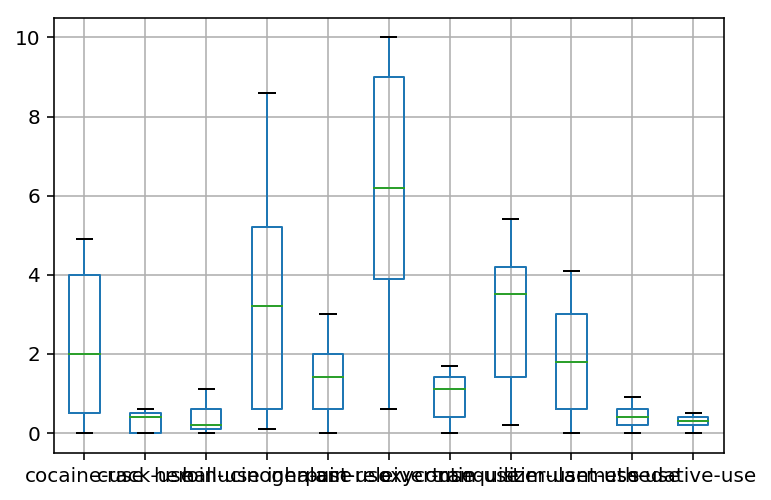

In [59]:
drug.boxplot(column=without)

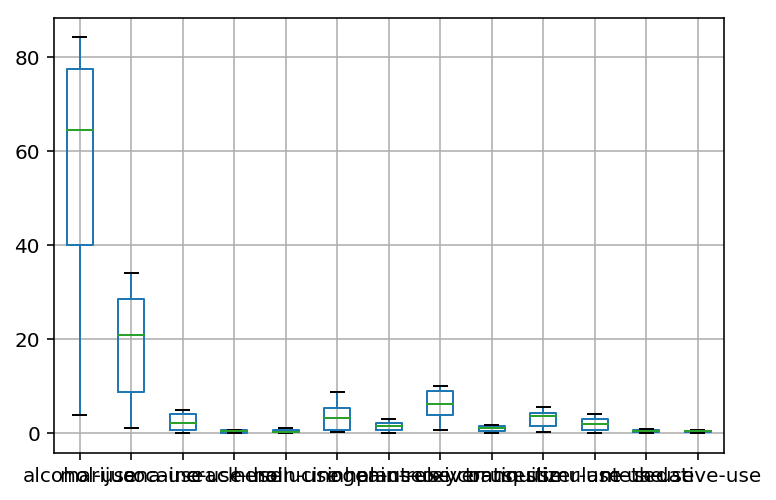

In [60]:
drug.boxplot(column=use)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

Q)Is marijuana a "gateway" drug linking to hard drug usage? Usage of marijuana is later followed by an increase in other hard drugs.

D)provide visualizations on increase in marijuana against increase in hard drugs
...

In [61]:

marijuana = ['marijuana-use','age']
harddrugs = [ 'crack-use','cocaine-use','meth-use','heroin-use']
marijuana.extend(harddrugs)
marijuanadf = drug[marijuana]


In [62]:

df_norm2 = (marijuanadf - marijuanadf.mean()) / (marijuanadf.max() - marijuanadf.min())

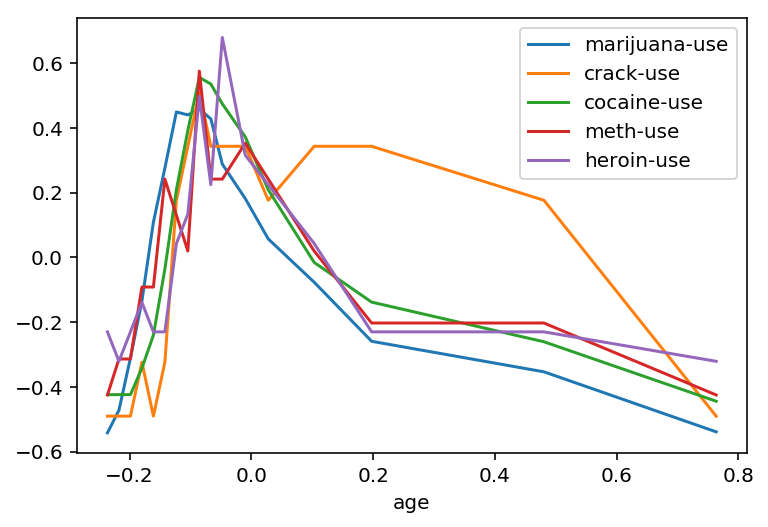

In [63]:
df_norm2.plot.line(x='age')

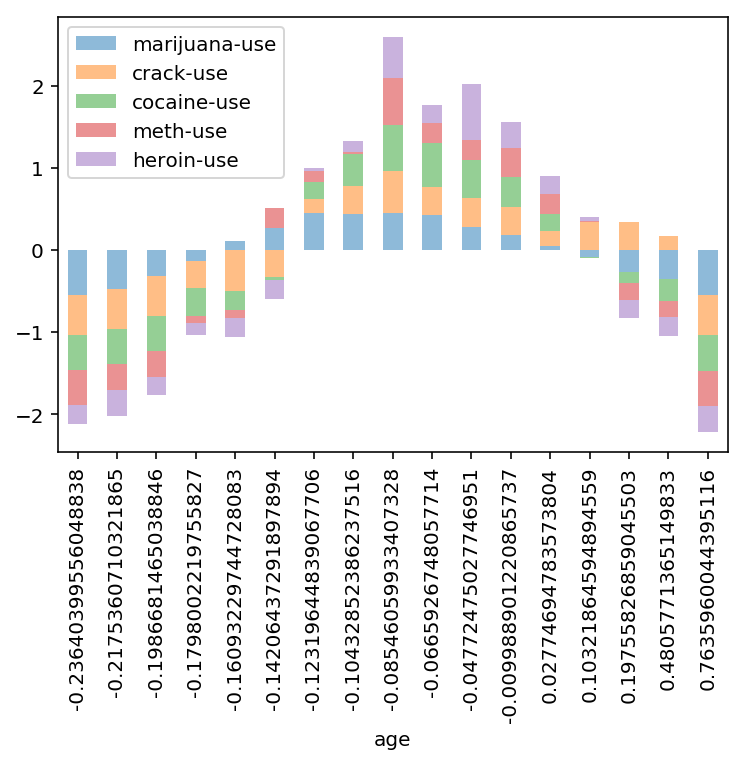

In [64]:
df_norm2.plot.bar(x= 'age',alpha=0.5, stacked = True)

In [65]:
# for age younger than 30
young = marijuanadf.loc[marijuanadf['age']<=30 , marijuana]

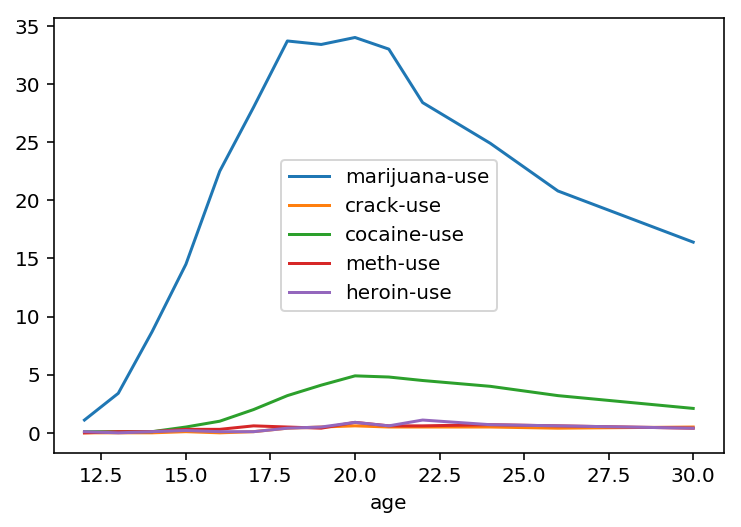

In [66]:
young.plot.line(x='age')

In [67]:
young.corr()

,marijuana-use,age,crack-use,cocaine-use,meth-use,heroin-use
marijuana-use,1.000000,0.429468,0.731259,0.867905,0.831035,0.640849
age,0.429468,1.000000,0.779695,0.616307,0.618454,0.624844
crack-use,0.731259,0.779695,1.000000,0.926686,0.792895,0.875844
cocaine-use,0.867905,0.616307,0.926686,1.000000,0.871737,0.887322
meth-use,0.831035,0.618454,0.792895,0.871737,1.000000,0.777993
heroin-use,0.640849,0.624844,0.875844,0.887322,0.777993,1.000000


**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [68]:
sat2['Rate']
sat2['Rate'] = pd.to_numeric(sat2['Rate'])

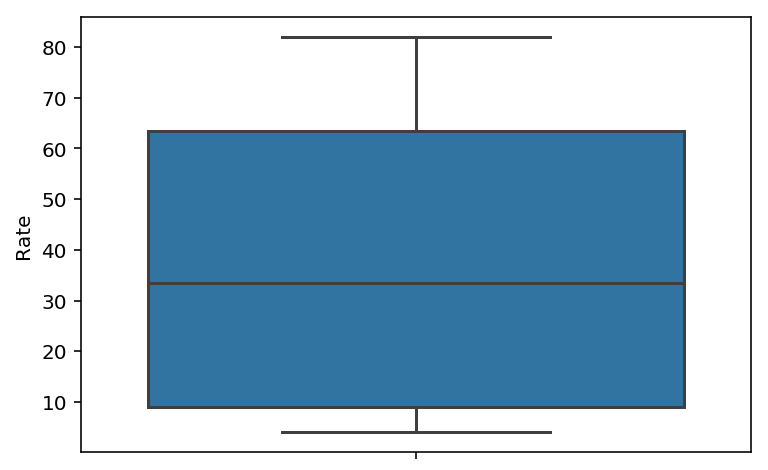

In [69]:
sns.boxplot(y=sat2['Rate'])

In [70]:
ratemean = np.mean(sat2['Rate'])
ratemedian = np.median(sat2['Rate'])
ratestd = np.std(sat2['Rate'])

In [71]:
print((sat2['Rate']>= ratemean + ratestd*1.5 ).sum())
print((sat2['Rate']<= ratemean - ratestd*1.5 ).sum())

3
0


In [72]:
sat2['Rate']>= ratemean + ratestd*1.5

0      True
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
Name: Rate, dtype: bool

In [73]:
clean = sat2['Rate'].drop(index = [0,1,2])
newratemean = np.mean(clean)
newratemedian = np.median(clean)
newratestd = np.std(clean)

print("With Outliers", '\n', ratemean, ratemedian,ratestd)
print ("Without Outliers", '\n', newratemean, newratemedian,newratestd)

With Outliers 
 37.15384615384615 33.5 27.03799649452359
Without Outliers 
 34.48979591836735 31.0 25.54797204219064


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [74]:
sat2['Math']=pd.to_numeric(sat2['Math'])
sat2['Verbal']=pd.to_numeric(sat2['Verbal'])

In [75]:
stats.spearmanr(sat2['Verbal'],sat2['Math'])

SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

In [76]:
stats.pearsonr(sat2['Verbal'],sat2['Math'])

(0.899870852544429, 1.192002673306768e-19)

In [77]:
#p value of spearman smaller than pearsonr

#The Pearson product-moment correlation coefficient (or Pearson correlation coefficient, for short) is a measure of the strength 
#of a linear association between two variables and is denoted by r. Basically, a Pearson product-moment correlation 
#attempts to draw a line of best fit through the data of two variables, and the Pearson correlation coefficient, r, 
#indicates how far away all these data points are to this line of best fit 
#(i.e., how well the data points fit this new model/line of best fit).


#The Spearman's rank-order correlation is the nonparametric version of the Pearson product-moment correlation. 
#Spearman's correlation coefficient, (ρ, also signified by rs) measures the strength and direction of association 
#between two ranked variables.


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [78]:
percentiles = [stats.percentileofscore(sat2['Rate'],element) for element in sat2['Rate'] ]
sat2['Rate_Percentiles']=percentiles

In [79]:
sat2[['Rate_Percentiles','Rate']].head()

,Rate_Percentiles,Rate
0,100.000000,82
1,98.076923,81
2,96.153846,79
3,94.230769,77
4,92.307692,72


In [80]:
sat2[sat2['State'] =='CA']['Rate_Percentiles']

23    56.730769
Name: Rate_Percentiles, dtype: float64

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

(array([2., 1., 1., 1., 1., 0., 2., 0., 1., 1., 1., 0., 2., 0., 4.]),
 array([ 1.1       ,  3.29333333,  5.48666667,  7.68      ,  9.87333333,
        12.06666667, 14.26      , 16.45333333, 18.64666667, 20.84      ,
        23.03333333, 25.22666667, 27.42      , 29.61333333, 31.80666667,
        34.        ]),
 <a list of 15 Patch objects>)

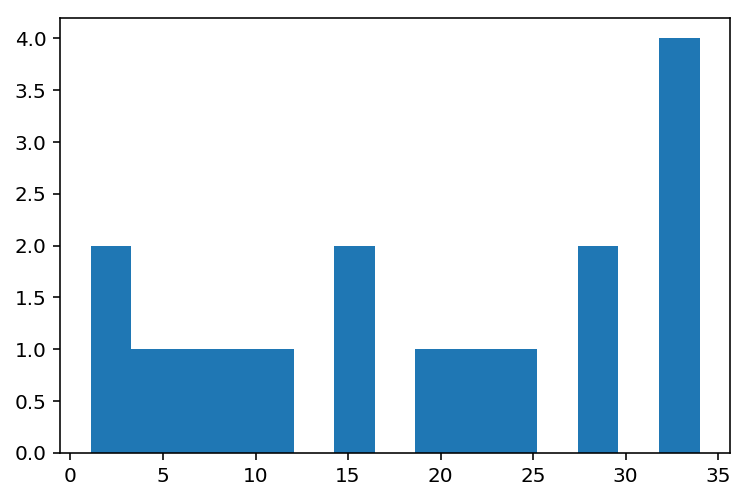

In [81]:
#Percentile scoring can be used to see sudden jumps in value
plt.hist(drug['marijuana-use'],bins=15)

In [82]:
marijuanapercentile = [stats.percentileofscore(drug['marijuana-use'],element) for element in drug['marijuana-use'] ]

(array([2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.]),
 array([  5.88235294,  12.15686275,  18.43137255,  24.70588235,
         30.98039216,  37.25490196,  43.52941176,  49.80392157,
         56.07843137,  62.35294118,  68.62745098,  74.90196078,
         81.17647059,  87.45098039,  93.7254902 , 100.        ]),
 <a list of 15 Patch objects>)

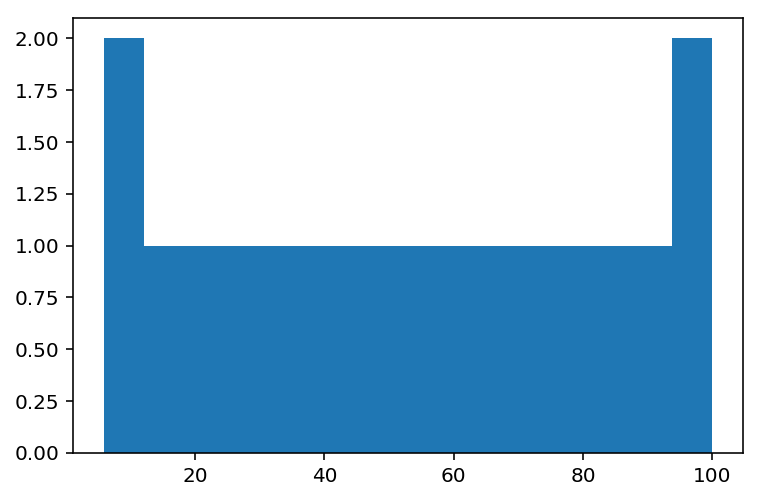

In [90]:
plt.hist(marijuanapercentile,bins=15)

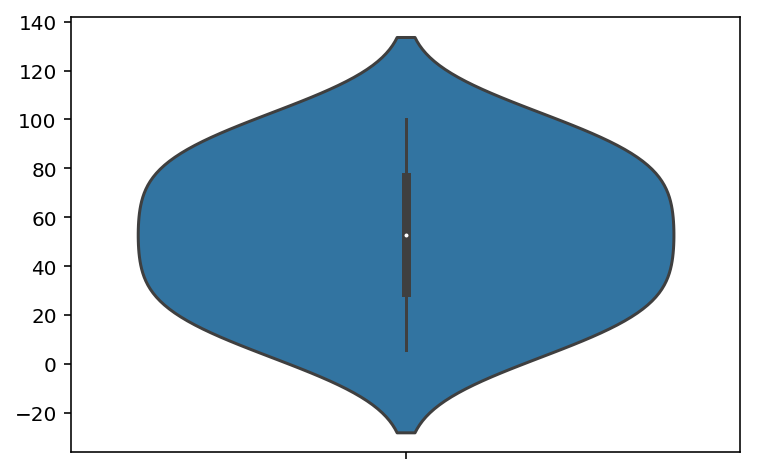

In [91]:
sns.violinplot(y=marijuanapercentile)